# Classification modelling

Classification modeling is a cornerstone of machine learning, aiming to predict categorical labels or classes based on input data. This technique categorizes data into distinct classes, making it widely applicable across diverse fields due to its versatility. The primary goal is to create a model that accurately assigns class labels to new data based on patterns learned from labeled training data.

**Types of Classification Algorithms**
- **Linear Classifiers:** Models like Logistic Regression, Perceptron, and Linear SVM.
- **Tree-Based Classifiers:** Decision Trees, Random Forest, Gradient Boosting Machines (GBM), and AdaBoost.
- **Instance-Based Classifiers:** e.g., k-Nearest Neighbors (k-NN).
- **Neural Network Classifiers:** Multi-layer Perceptrons (MLP).

**Overview**
- **Data Preparation:** Involves handling missing values, scaling features, encoding categorical variables, and splitting data into training and testing sets.
- **Model Training:** The classifier learns the relationship between input features and target labels from the training data by adjusting internal parameters.
- **Hyperparameter Tuning:** Fine-tuning model performance by optimizing hyperparameters using techniques like grid search, random search, or Bayesian optimization.
- **Model Evaluation:** Assessing model performance using metrics like accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices.
- **Overfitting and Regularization:** Mitigating overfitting using cross-validation, early stopping, and regularization techniques (L1, L2 regularization).
- **Ensemble Methods:** Combining multiple classifiers (bagging, boosting, stacking) to improve predictive performance.
- **Model Interpretability:** Some models offer interpretability (e.g., Decision Trees), aiding in understanding prediction reasoning.
- **Handling Imbalanced Data:** Techniques to address class imbalances like oversampling, undersampling, or specialized algorithms (e.g., SMOTE).

**Examples**
- **Fraud Detection - Anomaly Identification**
    - **Problem:** Identifying fraudulent activities in transactions or behavior.
    - **Application:** Using classification algorithms (e.g., Decision Trees, Ensemble methods) on transactional data to flag anomalies or unusual patterns indicative of fraudulent behavior.
- **Finance - Credit Risk Assessment**
    - **Problem:** Assessing credit risk for loan applications to predict whether a borrower is likely to default.
    - **Application:** Utilizing historical data on borrowers, financial transactions, and credit history, models like Logistic Regression or Gradient Boosting can predict the likelihood of default based on various features.
- **Healthcare - Disease Diagnosis**
    - **Problem:** Predicting whether a patient has a particular disease based on symptoms and medical history.
    - **Application:** Using a dataset containing patient information, lab results, and symptoms, a model (e.g., Decision Trees, Random Forests) can classify whether a patient has a specific illness (e.g., diabetes, cancer).

**Conclusion**

Classification modeling empowers automated decision-making in various domains. Successful implementation involves a deep understanding of data, feature engineering, model selection, optimization, and robust evaluation. The choice of classifier depends on factors like dataset characteristics, interpretability, and problem nature. Continuous advancements in algorithms enhance the accuracy and efficiency of classification models for real-world problem-solving.

## Creating train and test data

In [3]:
# Essential for modelling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Other packages
from ucimlrepo import fetch_ucirepo
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fetch = fetch_ucirepo(id=545)
X = fetch.data.features
y = fetch.data.targets
rice = pd.concat([X, y], axis=1)

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2023)

# Encoding Class (Cammeo and Osmancik into 0 and 1)
label_encoder = LabelEncoder()
y_LE = y.copy()
y_LE['Class'] = label_encoder.fit_transform(y_LE['Class'])

# Splitting into train and test data with labels encoded (needed for XGBoost)
X_train_LE, X_test_LE, y_train_LE, y_test_LE = train_test_split(X, y_LE, test_size = 0.2, random_state=2023)

# Normalize the data to use when needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_LE = scaler.fit_transform(X_train_LE)
X_test_LE = scaler.transform(X_test_LE)

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a fundamental algorithm used in machine learning for classification and regression tasks. KNN is an instance-based learning method that doesn't build an explicit model during the training phase. Instead, it memorizes the entire training dataset and makes predictions based on the similarity of new data points to known data points. The parameter `n_neighbors` defines the number of neighbors to consider when making predictions. It's crucial as it directly influences the flexibility or smoothness of the decision boundary. Choosing an optimal number of neighbors is vital to prevent overfitting or underfitting.

- **Pros:** Simple, intuitive, and effective for smaller datasets with non-complex decision boundaries.
- **Cons:** Computationally expensive for larger datasets due to calculating distances for each new point against the entire training set.

**KNN process**
   - The algorithm stores all training data points along with their associated class labels (for classification) or values (for regression).
   - When given a new data point, KNN calculates its distance from all points in the training set using a chosen distance metric (like Euclidean or Manhattan distance).
   - It identifies the 'K' closest data points (neighbors) to the new point based on this distance.
   - For classification, it selects the majority class among these 'K' neighbors as the predicted class for the new data point.
   - For regression, it computes the average (or weighted average) of the values of these 'K' neighbors as the prediction for the new point.

**Key Considerations**

- **Choice of K:** The value of 'K' significantly influences KNN's performance. A smaller 'K' can lead to overfitting, while a larger 'K' might cause underfitting.
- **Distance Metrics:** Different distance metrics (e.g., Euclidean, Manhattan) impact the algorithm's behavior and accuracy.
- **Normalization:** Scaling or normalizing features is often necessary to ensure all features contribute equally to the distance calculations.

**Code Description**

The provided code snippet performs a comprehensive analysis of the KNN algorithm. Here's a breakdown:

- **Parameter Tuning:** It explores various values for n_neighbors ranging from 1 to 50 to find the optimal value by training KNN models with different neighbors and recording their corresponding accuracies on the test dataset.
- **Accuracy Visualization:** The code generates a plot illustrating the relationship between the number of neighbors (K-value) and the accuracy achieved by the KNN model. The red dot on the plot indicates the optimal K-value where the model achieves the highest accuracy.
- **Model Training and Evaluation:** Using the optimal K-value, a final KNN model is trained on the training data. The code then evaluates this model on the test data, calculating metrics such as accuracy, classification report, and confusion matrix to assess its performance.
- **Interpretation of Results:** The output showcases the accuracy achieved by the optimized KNN model on the test data, along with a detailed classification report providing insights into precision, recall, and F1-score for each class. Additionally, the confusion matrix helps visualize the model's performance in predicting true positives, true negatives, false positives, and false negatives across different classes.

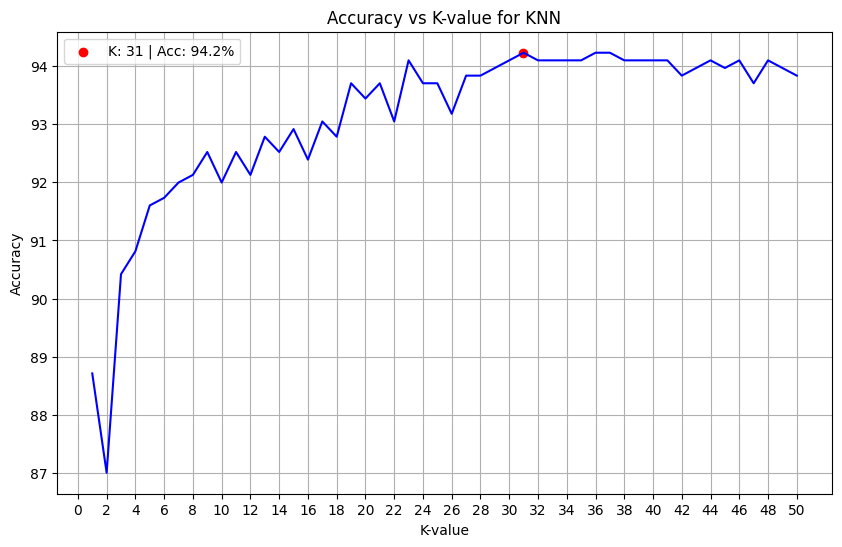

Accuracy: 94.2%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.91      0.95      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[292  16]
 [ 28 426]]


In [4]:
from sklearn.neighbors import KNeighborsClassifier

KNN_results = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_results.append({'K-value': k, 'Accuracy': accuracy*100})

KNN_accuracy_df = pd.DataFrame(KNN_results)

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for K
KNN_model = KNeighborsClassifier(n_neighbors = KNN_k_max)
KNN_model.fit(X_train, y_train.values.ravel())
KNN_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test.values.ravel(), KNN_pred)
KNN_cr = classification_report(y_test.values.ravel(), KNN_pred)
KNN_cm = confusion_matrix(y_test.values.ravel(), KNN_pred)

# Printing the metrics
print("Accuracy:", f"{KNN_accuracy * 100:.1f}%\n")
print("Classification Report\n", KNN_cr)
print("Confusion Matrix\n", KNN_cm)

## Decision Tree (DT)

Decision Trees are a widely used machine learning algorithm for classification and regression tasks. They organize data into a tree-like structure, with each node representing a feature, each branch a decision rule, and each leaf node an outcome or prediction. Decision Trees, despite overfitting tendencies, are valued for their simplicity and interpretability. They serve as a foundation for more complex ensemble methods like Random Forests and Gradient Boosting.

**Tree Structure**
- **Root Node:** Top node indicating the best feature to split the dataset.
- **Internal Nodes:** Nodes representing features used for decision-making.
- **Leaf Nodes:** Terminal nodes with final predictions.

**Splitting Criteria**
- **Gini Impurity:** Measures classification error.
- **Information Gain (Entropy):** Quantifies information gain from attribute splits.
- **Reduction in Variance:** Measures variance reduction in regression.

**Decision-Making Process**
- Recursive selection of the best attribute for splitting the data.
- Continues until all attributes are used or a stopping criterion is met.

**Advantages**
- **Interpretability:** Easy-to-understand rules.
- **Handle Nonlinear Relationships:** Capture nonlinear relationships.
- **Feature Importance:** Insight into important features.

**Challenges**
- **Overfitting:** Tendency to overfit training data.
- **Sensitive to Small Variations:** Can produce different structures with slight data variations.

**Applications**
- **Business Decision-Making:** Marketing strategies, risk assessment.
- **Healthcare:** Medical diagnosis, disease prediction.

This code snippet conducts an analysis using the Decision Tree Classifier from scikit-learn. This code aims to determine the optimal tree depth for the Decision Tree Classifier by testing various depths and assessing their accuracy on the test dataset. It subsequently creates and evaluates a final Decision Tree model based on the optimal depth.

- It iterates through different depths of the decision tree (1 to 10) to evaluate the model's performance.
- For each iteration, it creates a Decision Tree Classifier with 'entropy' as the splitting criterion, a fixed random state of 100, and varying depths.
- The model is trained using the training data (`X_train` and `y_train`) and tested on the test data (`X_test`).
- Computes the accuracy of the model's predictions on the test set using `accuracy_score`.
- Stores depth and accuracy in a list `DT_results`.
- Organizes collected results into a DataFrame (`DT_accuracy_df`) for further analysis.
- Identifies the depth with the highest test accuracy and records its corresponding accuracy.
- Generates a plot illustrating the relationship between tree depth and test accuracy.
- Marks the point with the highest accuracy in red on the plot.
- Constructs a new Decision Tree Classifier (`DT_model`) using the depth yielding the highest accuracy.
- Retrains this optimal model on the training data and evaluates it on the test data.
- Computes metrics such as accuracy, classification report, and confusion matrix, printing the results.

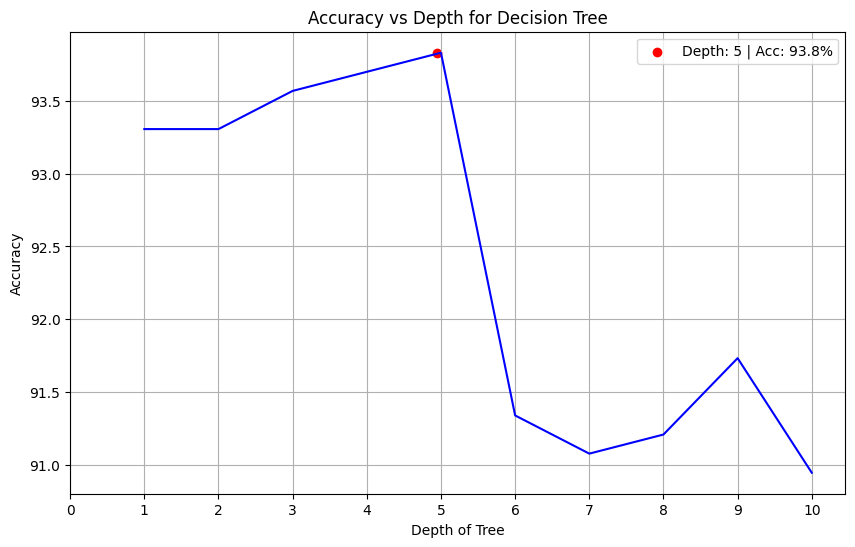

Accuracy: 93.8%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.93      0.92      0.92       308
    Osmancik       0.94      0.95      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.93      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[282  26]
 [ 21 433]]


In [5]:
from sklearn.tree import DecisionTreeClassifier

DT_results = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.values.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_results.append({'Depth': i, 'Accuracy': accuracy*100})
    
DT_accuracy_df = pd.DataFrame(DT_results)

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 11, 1))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for Depth
DT_model = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = DT_depth_max)
DT_model.fit(X_train, y_train.values.ravel())
DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test.values.ravel(), DT_pred)
DT_cr = classification_report(y_test.values.ravel(), DT_pred)
DT_cm = confusion_matrix(y_test.values.ravel(), DT_pred)

# Printing the metrics
print("Accuracy:", f"{DT_accuracy * 100:.1f}%\n")
print("Classification Report\n", DT_cr)
print("Confusion Matrix\n", DT_cm)

## Random Forest (RF)

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the mode of the classes (classification) or the average prediction (regression) of individual trees. Random Forests are a powerful and flexible machine learning technique, known for their robustness and ability to handle complex datasets. They serve as a go-to choice for many machine learning tasks due to their accuracy and versatility.

**How Random Forest Works**
- **Bootstrap Aggregating (Bagging):** Random Forest builds multiple decision trees by bootstrapping the dataset (sampling with replacement) to create different subsets.
- **Feature Randomness:** For each tree, only a subset of features is considered at each split. This randomness reduces correlation between trees.
- **Tree Construction:** Each tree is constructed using a subset of the dataset and features, optimizing based on a random subset of features at each node.
- **Voting/Averaging:** For classification, the mode (most frequent prediction) of individual tree predictions is taken as the final prediction. For regression, it's the average of predictions.

**Advantages of Random Forest**
- **Ensemble Learning:** Combines multiple weak learners to form a stronger model, reducing overfitting and increasing accuracy.
- **Feature Importance:** Provides information about the relative importance of features in predicting the target variable.
- **Robustness to Overfitting:** Randomness in feature and dataset selection helps prevent overfitting.

**Considerations**
- **Computationally Intensive:** Training multiple trees can be resource-intensive, especially with large datasets or complex models.
- **Less Interpretability:** As the number of trees increases, interpretability may decrease.

**Applications**
- **Classification and Regression:** Widely used in various domains due to its versatility and robustness.
- **Feature Selection:** Identifying important features in a dataset.

**The model**

This code performs an extensive analysis of Random Forest using different combinations of hyperparameters and evaluates their impact on model accuracy.

- Tests various combinations of `max_depth` (from 2 to 10) and `n_estimators` (from 2 to 102 with a step size of 5).
- For each combination, a RandomForestClassifier is created using 'entropy' as the criterion, a fixed random state of 100, and varying `max_depth` and `n_estimators`.
- Trains the model on the training data (`X_train` and `y_train`) and evaluates its accuracy on the test data (`X_test`).
- Records the achieved accuracy along with the `max_depth` and `n_estimators` values in a list `RF_results`.
- Finds the combination (depth and estimators) that yields the highest accuracy and prints its details.
- Creates a heatmap displaying accuracy scores based on different `max_depth` and `n_estimators` combinations using `sns.heatmap`.
- Constructs a new RandomForestClassifier (`RF_model`) using the optimal `max_depth` and `n_estimators` values.
- Retrains this model on the training data and evaluates its performance on the test data.
- Computes metrics like accuracy, classification report, and confusion matrix, printing the results.

This code aims to determine the best combination of hyperparameters (`max_depth` and `n_estimators`) for the Random Forest Classifier by exploring various combinations and evaluating their accuracy on the test dataset. Subsequently, it creates and evaluates a final Random Forest model based on the optimal hyperparameters.


Best combination
Depth          5.000000
Estimators    47.000000
Accuracy      94.225722
Name: 72, dtype: float64


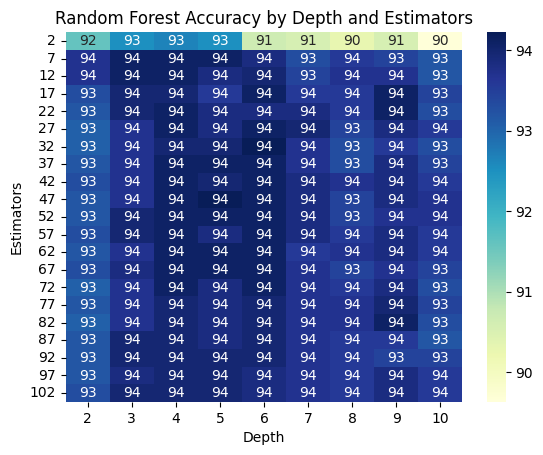

Accuracy: 94.2%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.92      0.94      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[290  18]
 [ 26 428]]


In [6]:
from sklearn.ensemble import RandomForestClassifier

max_depth_values = list(range(2, 11))  # Test max_depth from 2 to 10
n_estimators_values = list(range(2, 103, 5))  # Test n_estimators from 2 to 102 with step size 5

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.values.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

# Creating the model using the optimum value for Depth
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X_train, y_train.values.ravel())
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test.values.ravel(), RF_pred)
RF_cr = classification_report(y_test.values.ravel(), RF_pred)
RF_cm = confusion_matrix(y_test.values.ravel(), RF_pred)

# Printing the metrics
print("Accuracy:", f"{RF_accuracy * 100:.1f}%\n")
print("Classification Report\n", RF_cr)
print("Confusion Matrix\n", RF_cm)

## Support Vector Machines (SVM)

Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. It's particularly effective in scenarios with clear margin-based separation between classes. SVM is a versatile algorithm known for its ability to handle complex datasets and perform well in various machine learning tasks. Its efficiency in high-dimensional spaces and ability to handle non-linear relationships make it a valuable tool in the machine learning landscape.

**How SVM Works**

- **Maximizing Margin:** SVM finds the optimal hyperplane that maximizes the margin, i.e., the distance between the decision boundary and the closest data points (support vectors) of different classes.
- **Kernel Trick:** SVM can efficiently handle non-linearly separable data by transforming the input space into a higher-dimensional feature space using kernel functions (e.g., polynomial, radial -basis function (RBF), sigmoid).
- **Classification:** For classification tasks, SVM aims to find the hyperplane that best separates different classes, maximizing the margin while minimizing classification errors.
- **Regression:** In regression tasks, SVM aims to fit a hyperplane that captures the majority of data points within a margin of tolerance.
- **Support Vectors:** Data points that are closest to the decision boundary and have a significant impact on determining the optimal hyperplane.
- **Kernel Functions:** Allows SVM to handle non-linear relationships by transforming data into a higher-dimensional space where linear separation becomes feasible.

**Advantages of SVM**
- **Effective in High-Dimensional Spaces:** SVM performs well even in high-dimensional spaces, making it suitable for complex datasets.
- **Robust to Overfitting:** By maximizing margins, SVM tends to generalize well and is less prone to overfitting.
- **Versatile:** Can handle both linearly and non-linearly separable data through kernel functions.

**Considerations**
- **Computationally Intensive:** SVM can be resource-intensive, especially with larger datasets.
- **Sensitivity to Kernel Choice:** The choice of the kernel and its parameters significantly affects SVM performance.

**Applications**
- **Classification Tasks:** Image recognition, text categorization, biological classification.
- **Regression Tasks:** Financial forecasting, time-series analysis.

**The model**

This code utilizes a grid search technique to find the best combination of hyperparameters for an SVM model and evaluates its performance on test data. This code automates the process of hyperparameter optimization for the SVM model, enabling the selection of the best parameters that maximize performance on the training data and subsequent evaluation on the test dataset.

- Defines a grid of hyperparameters including `C`, `gamma`, and `kernel` for the SVM model.
- Employs `GridSearchCV` to perform an exhaustive search over the defined hyperparameter grid.
- It uses cross-validation to assess different combinations of hyperparameters on the training data to find the best set.
- Trains the SVM model on the training data (`X_train`, `y_train`) with various hyperparameter combinations to find the optimal set.
- Prints the best combination of hyperparameters obtained from the grid search.
- Constructs an SVM model (`SVM_pred`) using the best parameters derived from the grid search.
- Computes and evaluates the model's performance on the test data (`X_test`, `y_test`).
- Metrics include accuracy, classification report (precision, recall, F1-score), and the confusion matrix.
- Outputs the computed accuracy, classification report, and confusion matrix to assess the model's performance on unseen test data.

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid

# Grid search for the best parameters
SVM_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
SVM_grid = GridSearchCV(SVC(), SVM_param_grid, refit = True, verbose = 0)
SVM_grid.fit(X_train, y_train.values.ravel())
print(SVM_grid.best_estimator_)

# Creating the model using the best parameters from the Grid Search
SVM_pred = SVM_grid.predict(X_test)
SVM_accuracy = accuracy_score(y_test.values.ravel(), SVM_pred)
SVM_cr = classification_report(y_test.values.ravel(), SVM_pred)
SVM_cm = confusion_matrix(y_test.values.ravel(), SVM_pred)

# Printing the metrics
print("Accuracy:", f"{SVM_accuracy * 100:.1f}%\n")
print("Classification Report\n", SVM_cr)
print("Confusion Matrix\n", SVM_cm)

SVC(C=100, gamma=0.01)
Accuracy: 94.0%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.91      0.94      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[290  18]
 [ 28 426]]


## Naive Bayes (NB)

Naive Bayes is a family of simple yet powerful probabilistic classifiers based on Bayes' theorem with an assumption of independence among features.

**How Naive Bayes Works**
- **Bayes' Theorem:** Naive Bayes relies on Bayes' theorem, which calculates the probability of a hypothesis given the data.
- **Assumption of Feature Independence:** Naive Bayes assumes that the presence of a particular feature in a class is independent of other features. This is a strong assumption but simplifies calculations.
- **Probabilistic Classification:** For a given instance, Naive Bayes computes the probabilities of it belonging to each class based on the feature values. The class with the highest probability is predicted as the output.

**Types of Naive Bayes**
- **Gaussian Naive Bayes:** Assumes that features follow a Gaussian distribution.
- **Multinomial Naive Bayes:** Suited for multinomially distributed data, often used in text classification (word frequencies).
- **Bernoulli Naive Bayes:** Assumes features are binary (e.g., presence or absence of a feature).

**Advantages of Naive Bayes**
- **Simplicity and Efficiency:** Easy to implement and computationally efficient, especially with large datasets.
- **Works Well with High-Dimensional Data:** Performs well even with a large number of features.
- **Can Handle Missing Values:** Robust to missing or unobserved data.

**Considerations**
- **Assumption of Feature Independence:** While it simplifies calculations, in real-world scenarios, features might not be entirely independent.
- **Sensitive to Irrelevant Features:** Unrelated or correlated features might impact the classification performance.

**Applications**
- **Text Classification:** Spam filtering, sentiment analysis.
- **Medical Diagnosis:** Disease prediction based on symptoms.
- **Recommendation Systems:** Personalized recommendations in e-commerce.

Naive Bayes classifiers, despite their simplistic assumptions, are widely used in various applications due to their speed, simplicity, and efficiency, especially in scenarios with a large number of features or text data.

The Gaussian Naive Bayes model in this code doesn't involve hyperparameter tuning, unlike some other models. It's a probabilistic classifier assuming that features follow a Gaussian distribution within each class. The steps performed in the code cover training the model, making predictions, and evaluating its performance using common classification metrics.

The printed metrics provide insights into how well the Gaussian Naive Bayes model performed on the test data. This includes the overall accuracy, precision, recall, F1-score, and a confusion matrix depicting the true positive, true negative, false positive, and false negative predictions made by the model.

Naive Bayes, particularly Gaussian Naive Bayes, is known for its simplicity and efficiency, especially in scenarios where the assumption of feature independence holds to a reasonable extent. However, it's worth noting that this assumption might not always hold in real-world datasets.


In [8]:
from sklearn.naive_bayes import GaussianNB

# Unlike the other models, Naive Bayes has no parameters that need tuning
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.values.ravel())
NB_pred = NB_model.predict(X_test)
NB_accuracy = accuracy_score(y_test.values.ravel(), NB_pred)
NB_cr = classification_report(y_test.values.ravel(), NB_pred)
NB_cm = confusion_matrix(y_test.values.ravel(), NB_pred)

# Printing the metrics
print("Accuracy:", f"{NB_accuracy * 100:.1f}%\n")
print("Classification Report\n", NB_cr)
print("Confusion Matrix\n", NB_cm)

Accuracy: 92.0%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.89      0.92      0.90       308
    Osmancik       0.94      0.92      0.93       454

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762

Confusion Matrix
 [[283  25]
 [ 36 418]]


## Logistic Regression (LR)

Logistic Regression is a supervised learning algorithm used for binary classification problems. Despite its name containing "regression," it's utilized for classification tasks.

**How Logistic Regression Works**
- **Linear Model with Sigmoid Function:** Logistic Regression models the relationship between the dependent binary variable and one or more independent variables. It utilizes a linear equation combined with the sigmoid (logistic) function to map predicted values between 0 and 1.
- **Sigmoid Function:** Transforms the output of the linear equation into a probability score, representing the likelihood of belonging to a specific class. The function ensures the predicted probabilities are bounded between 0 and 1.
- **Decision Boundary:** Logistic Regression determines a decision boundary (usually 0.5) to classify instances into one of the two classes based on the calculated probabilities.

**Key Aspects**
- **Hypothesis Function:** The logistic regression hypothesis outputs a probability score using the linear combination of input features.
- **Cost Function:** Utilizes the log loss or cross-entropy loss function to measure the error between predicted probabilities and actual labels.
- **Regularization:** Can be regularized to prevent overfitting by adding penalty terms to the cost function (L1 or L2 regularization).

**Advantages of Logistic Regression**
- **Interpretability:** Provides coefficients indicating the strength and direction of the relationships between features and the target variable.
- **Efficiency:** Computationally efficient and works well with small to medium-sized datasets.
- **Probabilistic Outputs:** Outputs probabilities that can be interpreted as confidence in predictions.

**Considerations**
- **Linear Assumption:** Assumes a linear relationship between features and the log-odds of the target variable.
- **Sensitive to Outliers:** Outliers can significantly impact the model's performance.

**Applications**
- **Binary Classification Tasks:** Spam detection, churn prediction, medical diagnosis (disease/no disease).
- **Risk Management:** Assessing financial risk, credit scoring.

Logistic Regression, despite its simplicity, remains a fundamental and widely used algorithm for binary classification tasks. Its interpretability, efficiency, and probabilistic nature make it a go-to choice for various practical applications.

**The model**

This code automates the search for optimal hyperparameters for a Logistic Regression model through a grid search approach, identifying the combination that yields the highest accuracy. It then constructs and evaluates the model using the best hyperparameters obtained from the search. The printed metrics offer insights into the model's performance on the test data, aiding in the selection of the best hyperparameters for the Logistic Regression model.

- Defines ranges for hyperparameters (`penalty`, `C`, `solver`) to test during grid search.
- Iterates through combinations of hyperparameters using `ParameterGrid`.
- Creates a logistic regression model with each parameter combination, excluding combinations that are incompatible (e.g., specific penalties with certain solvers).
- Trains the model on the training data and evaluates its accuracy on the test data for each parameter combination, storing results in `LR_results`.
- Constructs a heatmap displaying the accuracy for different C values and penalty types using `sns.heatmap`.
- Determines the row index corresponding to the highest accuracy in `LR_results_df`.
- Retrieves the best hyperparameters (`penalty`, `C`, `solver`) based on the row with the maximum accuracy.
- Creates a Logistic Regression model (`LR_model`) using the best hyperparameters obtained.
- Trains this model on the training data and evaluates its performance on the test data.
- Computes metrics such as accuracy, classification report, and confusion matrix.
- Outputs the best hyperparameters found, along with accuracy, classification report, and confusion matrix to assess the Logistic Regression model's performance on the test dataset.


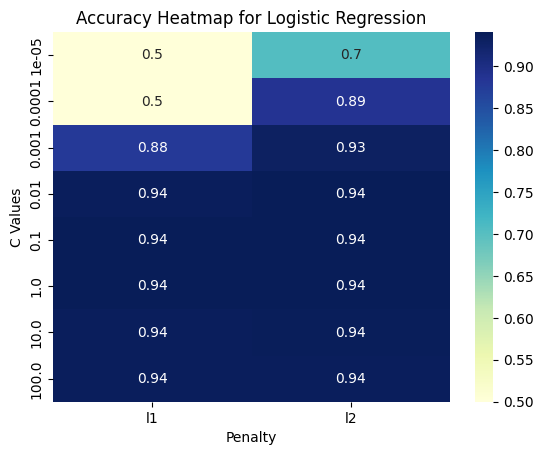

Best hyperparameters
C               0.01
Solver          saga
Penalty           l1
Accuracy    0.940945
Name: 16, dtype: object

Accuracy: 94.1%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.91      0.95      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[292  16]
 [ 29 425]]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define ranges for hyperparameters
penalty_values = ['l1', 'l2']
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]  # List of C values to test
solver_values = ['liblinear', 'saga', 'sag']  # Different solvers supporting both 'l1' and 'l2' penalties

# Perform grid search
LR_results = []

for params in ParameterGrid({'penalty': penalty_values, 'C': C_values, 'solver': solver_values}):
    if (params['solver'] in ['lbfgs', 'sag']) and params['penalty'] == 'l1':
        continue  # Skip 'lbfgs' and 'sag' solvers with 'l1' penalty
    clf_lr = LogisticRegression(**params)
    clf_lr.fit(X_train, y_train.values.ravel())
    yhat = clf_lr.predict(X_test)
    accuracy = accuracy_score(y_test.values.ravel(), yhat)
    LR_results.append({'Penalty': params['penalty'], 'C': params['C'], 'Solver': params['solver'], 'Accuracy': accuracy})

LR_results_df = pd.DataFrame(LR_results)
pivot_table = LR_results_df.pivot_table(index='C', columns='Penalty', values='Accuracy')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Accuracy Heatmap for Logistic Regression')
plt.xlabel('Penalty')
plt.ylabel('C Values')
plt.show()

# Find the row index with the maximum accuracy
best_row_index = LR_results_df['Accuracy'].idxmax()

# Get the corresponding hyperparameters for the best result
best_hyperparameters = LR_results_df.loc[best_row_index, ['C', 'Solver', 'Penalty', 'Accuracy']]
best_C = best_hyperparameters['C']
best_solver = best_hyperparameters['Solver']
best_penalty = best_hyperparameters['Penalty']

print("Best hyperparameters")
print(best_hyperparameters)

# Fitting the model with the best hyperparameters
LR_model = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
LR_model.fit(X_train, y_train.values.ravel())
LR_pred = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test.values.ravel(), LR_pred)
LR_cr = classification_report(y_test.values.ravel(), LR_pred)
LR_cm = confusion_matrix(y_test.values.ravel(), LR_pred)

# Printing the metrics
print("\nAccuracy:", f"{LR_accuracy * 100:.1f}%\n")
print("Classification Report\n", LR_cr)
print("Confusion Matrix\n", LR_cm)

## Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm used to find the optimal parameters of a model by minimizing a loss function. It's particularly efficient for large-scale machine learning problems, especially in scenarios where datasets are substantial or when training time needs reduction.

**Working Principle**
- **Gradient Descent:** Similar to Gradient Descent, SGD aims to find the local minimum of a cost or loss function.
- **Iterative Updates:** Differs by using a single random sample or small subset (mini-batch) of the data to update parameters iteratively.
- **Parameter Update:** Computes the gradient of the loss function with respect to parameters using the current subset of data. Updates the model's parameters in the opposite direction of the gradient, scaled by a learning rate.
- **Efficiency:** Utilizes smaller data subsets, making it computationally more efficient, particularly for large datasets.

**Key Aspects**
- **Stochastic Nature:** Random sampling introduces noise but can help escape local minima and potentially converge faster.
- **Learning Rate:** Crucial for convergence speed and stability. An optimal learning rate is essential for efficient convergence.
- **Convergence Variability:** Stochastic nature may lead to oscillations or slower convergence compared to batch gradient descent.
- **Scaling Impact:** Feature scaling can affect convergence, as larger-scale features might dominate updates.

**Applications**
- **Large-Scale Machine Learning:** Beneficial for models dealing with massive datasets or high-dimensional spaces.
- **Deep Learning:** Utilized in training neural networks due to its efficiency.

SGD is a widely used optimization algorithm in machine learning, especially when computational efficiency matters or when dealing with large datasets. Its stochastic nature and ability to handle substantial data make it popular for training models across various domains.

In [10]:
from sklearn.linear_model import SGDClassifier

# Define hyperparameters for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['hinge', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

# Initialize SGDClassifier
sgd = SGDClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("\n")

# Fit a model using the best parameters
SGD_model = SGDClassifier(**best_params)
SGD_model.fit(X_train, y_train.values.ravel())
SGD_pred = SGD_model.predict(X_test)
SGD_accuracy = accuracy_score(y_test, SGD_pred)
SGD_cr = classification_report(y_test.values.ravel(), SGD_pred)
SGD_cm = confusion_matrix(y_test.values.ravel(), SGD_pred)

# Printing the metrics
print("Accuracy:", f"{SGD_accuracy * 100:.1f}%\n")
print("Classification Report\n", SGD_cr)
print("Confusion Matrix\n", SGD_cm)

Best Parameters: {'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1'}
Best Score: 0.9265089235241865


Accuracy: 93.3%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.91      0.93      0.92       308
    Osmancik       0.95      0.94      0.94       454

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

Confusion Matrix
 [[286  22]
 [ 29 425]]


## XGBoost


XGBoost, short for *eXtreme Gradient Boosting*, is a robust machine learning algorithm that falls under the category of ensemble learning methods, specifically boosting techniques.

**Gradient Boosting**
- **Boosting**: An ensemble method where multiple weak learners are combined to create a strong learner.
- **Gradient Boosting**: Sequentially adds predictors to an ensemble, with each correcting its predecessor's errors by fitting new models to the residual errors.

**Features of XGBoost**
- **Efficiency**: Optimized for performance and scalability through parallelization and tree pruning techniques.
- **Regularization**: Includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
- **Tree Boosting**: Uses decision trees as base learners, correcting errors iteratively.
- **Control Over Hyperparameters**: Allows greater control and customization over model behavior.
- **Handling Missing Values**: Capable of handling missing data efficiently by finding the best direction when values are missing.
- **Objective Functions**: Supports different objective functions for regression and classification tasks.

**Working of XGBoost**
- **Initialization**: Starts with a single leaf as the root.
- **Building Trees**: Constructs decision trees iteratively, correcting errors made by previous trees.
- **Loss Calculation**: Uses a loss function (e.g., mean squared error, log loss).
- **Gradient Calculation**: Computes gradients of the loss function with respect to predictions.
- **Weight Update**: Updates weights based on gradients for building the next tree.
- **Combining Trees**: Combines weak learners to create a strong predictive model.

**Benefits**
- **Predictive Accuracy**: Often yields higher accuracy.
- **Flexibility**: Suitable for various machine learning tasks.
- **Feature Importance**: Provides insights into important features for prediction.

XGBoost is widely used in machine learning competitions and industry applications due to its performance and flexibility.

**The model**

- Creates an instance of the XGBoost Classifier with the objective set to binary logistic regression and a specific random state for reproducibility.
Defines a grid of hyperparameters for the XGBoost model. It includes parameters like maximum depth of trees, learning rate, number of estimators (trees), and regularization terms (`reg_alpha` and `reg_lambda`).
- Utilizes scikit-learn's `GridSearchCV` to search for the best combination of hyperparameters. It uses cross-validation with 3 folds and evaluates based on accuracy (`scoring='accuracy'`).
- Fits the grid search on the training data.
- Retrieves the best parameters found by the grid search.
- Creates a new XGBoost model using the best parameters.
- Fits the XGBoost model on the training data using the best parameters.
- Uses the trained model to make predictions on the test data.
- `accuracy_score`, `classification_report`, and `confusion_matrix` are used to evaluate the performance of the XGBoost model on the test data.
- Metrics like accuracy, classification report (with precision, recall, F1-score), and confusion matrix are printed to assess how well the model performs on unseen data.
- The code prints out the accuracy score, classification report, and confusion matrix to assess the performance of the model on the test set.

In [11]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term (alpha)
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term (lambda)
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_LE, y_train_LE.values.ravel())

# Get the best parameters and fit a model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
XGB_model = xgb.XGBClassifier(**best_params)
XGB_model.fit(X_train_LE, y_train_LE.values.ravel())
XGB_pred = XGB_model.predict(X_test_LE)
XGB_accuracy = accuracy_score(y_test_LE, XGB_pred)
XGB_cr = classification_report(y_test_LE.values.ravel(), XGB_pred)
XGB_cm = confusion_matrix(y_test_LE.values.ravel(), XGB_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{XGB_accuracy * 100:.1f}%\n")
print("Classification Report\n", XGB_cr)
print("Confusion Matrix\n", XGB_cm)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0}


Accuracy: 94.4%

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       308
           1       0.96      0.95      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[289  19]
 [ 24 430]]


## Perceptron

The Perceptron is a fundamental building block of neural networks and serves as a simple linear binary classifier, primarily used in supervised learning tasks for binary classification. Perceptron updates weights to reduce misclassifications by adjusting them towards correctly classified samples.

**Key Concepts**
- **Architecture**: Comprises multiple inputs, each multiplied by a weight and summed with a bias. The sum passes through an activation function to produce the output.
- **Activation Function**: Traditionally employs a step function, outputting 1 if the weighted sum is above a threshold (typically 0), and 0 otherwise.

**How it Works**
- **Initialization**: Begins with random weights and a bias.
- **Learning Algorithm**: Iterates through the training data, updating weights based on misclassifications.
- **Weight Update**: Adjusts weights to minimize prediction errors.
- **Convergence**: Continues until convergence or a set number of iterations.

**Limitations**
- **Linear Separability**: Works well only when data is linearly separable, struggling with non-linear separations.
- **Convergence**: May fail to converge if data is not linearly separable.

**Advancements**
- **Multi-Layer Perceptron (MLP)**: Stacks perceptrons in layers, allowing non-linear decision boundaries.
- **Activation Functions**: Replaces step functions with more sophisticated ones (e.g., sigmoid, ReLU) for deeper network learning.

**Applications**
- Historically used for simple classification tasks, laying the foundation for more complex neural network architectures.
- While less commonly used alone today due to limitations, it underpins understanding in modern neural network development.

The perceptron is a fundamental model in neural networks, serving as a starting point for more complex architectures and supervised learning algorithms.

**The model**
- Initializes the Perceptron classifier
- Specifies the grid of hyperparameters (`alpha` in this case)
- Sets up Grid Search with cross-validation
- Retrieves the best parameters and corresponding accuracy
- Prints the best parameters and accuracy
- Recreates the Perceptron classifier using best parameters

In [12]:
from sklearn.linear_model import Perceptron

# Define the Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)

# Define the grid of parameters to search
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=perceptron_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)

# Fit a model with the best params
perceptron_classifier = Perceptron(**best_params)
perceptron_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on test data
perceptron_pred = perceptron_classifier.predict(X_test)
perceptron_accuracy = accuracy_score(y_test.values.ravel(), perceptron_pred)
perceptron_cr = classification_report(y_test.values.ravel(), perceptron_pred)
perceptron_cm = confusion_matrix(y_test.values.ravel(), perceptron_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{perceptron_accuracy * 100:.1f}%\n")
print("Classification Report\n", perceptron_cr)
print("Confusion Matrix\n", perceptron_cm)

Best Parameters: {'alpha': 0.0001}


Accuracy: 90.7%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.88      0.90      0.89       308
    Osmancik       0.93      0.91      0.92       454

    accuracy                           0.91       762
   macro avg       0.90      0.91      0.90       762
weighted avg       0.91      0.91      0.91       762

Confusion Matrix
 [[276  32]
 [ 39 415]]


## Gradient Boosting (GBM)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search_gbm = GridSearchCV(gbm, param_grid=param_grid_gbm, cv=5)
grid_search_gbm.fit(X_train, y_train.values.ravel())

best_gbm = grid_search_gbm.best_estimator_
best_gbm.fit(X_train, y_train.values.ravel())
gbm_pred = best_gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test.values.ravel(), gbm_pred)
gbm_cr = classification_report(y_test.values.ravel(), gbm_pred)
gbm_cm = confusion_matrix(y_test.values.ravel(), gbm_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{gbm_accuracy * 100:.1f}%\n")
print("Classification Report\n", gbm_cr)
print("Confusion Matrix\n", gbm_cm)



Accuracy: 93.7%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.91      0.94      0.92       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.93      0.94      0.93       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[289  19]
 [ 29 425]]


## AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search_adaboost = GridSearchCV(adaboost, param_grid=param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train.values.ravel())

best_adaboost = grid_search_adaboost.best_estimator_
best_adaboost.fit(X_train, y_train.values.ravel())
adaboost_pred = best_adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test.values.ravel(), adaboost_pred)
adaboost_cr = classification_report(y_test.values.ravel(), adaboost_pred)
adaboost_cm = confusion_matrix(y_test.values.ravel(), adaboost_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{adaboost_accuracy * 100:.1f}%\n")
print("Classification Report\n", adaboost_cr)
print("Confusion Matrix\n", adaboost_cm)



Accuracy: 94.0%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.93      0.93      0.93       308
    Osmancik       0.95      0.95      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[285  23]
 [ 23 431]]


## Bagging

In [15]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

grid_search_bagging = GridSearchCV(bagging, param_grid=param_grid_bagging, cv=5)
grid_search_bagging.fit(X_train, y_train.values.ravel())

best_bagging = grid_search_bagging.best_estimator_
best_bagging.fit(X_train, y_train.values.ravel())
bagging_pred = best_bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test.values.ravel(), bagging_pred)
bagging_cr = classification_report(y_test.values.ravel(), bagging_pred)
bagging_cm = confusion_matrix(y_test.values.ravel(), bagging_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{bagging_accuracy * 100:.1f}%\n")
print("Classification Report\n", bagging_cr)
print("Confusion Matrix\n", bagging_cm)



Accuracy: 93.2%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.90      0.94      0.92       308
    Osmancik       0.95      0.93      0.94       454

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

Confusion Matrix
 [[288  20]
 [ 32 422]]


## Extra Trees

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier()
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search_extra_trees = GridSearchCV(extra_trees, param_grid=param_grid_extra_trees, cv=5)
grid_search_extra_trees.fit(X_train, y_train.values.ravel())

best_extra_trees = grid_search_extra_trees.best_estimator_
best_extra_trees.fit(X_train, y_train.values.ravel())
extra_trees_pred = best_extra_trees.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test.values.ravel(), extra_trees_pred)
extra_trees_cr = classification_report(y_test.values.ravel(), extra_trees_pred)
extra_trees_cm = confusion_matrix(y_test.values.ravel(), extra_trees_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{extra_trees_accuracy * 100:.1f}%\n")
print("Classification Report\n", extra_trees_cr)
print("Confusion Matrix\n", extra_trees_cm)



Accuracy: 94.1%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.92      0.94      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[289  19]
 [ 26 428]]


## Multi-layer Perceptron

In [17]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_mlp = GridSearchCV(mlp_classifier, param_grid=param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train.values.ravel())

best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train.values.ravel())
mlp_pred = best_mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test.values.ravel(), mlp_pred)
mlp_cr = classification_report(y_test.values.ravel(), mlp_pred)
mlp_cm = confusion_matrix(y_test.values.ravel(), mlp_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{mlp_accuracy * 100:.1f}%\n")
print("Classification Report\n", mlp_cr)
print("Confusion Matrix\n", mlp_cm)



Accuracy: 93.6%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.90      0.94      0.92       308
    Osmancik       0.96      0.93      0.95       454

    accuracy                           0.94       762
   macro avg       0.93      0.94      0.93       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[291  17]
 [ 32 422]]


# Model Summary

## Accuracy

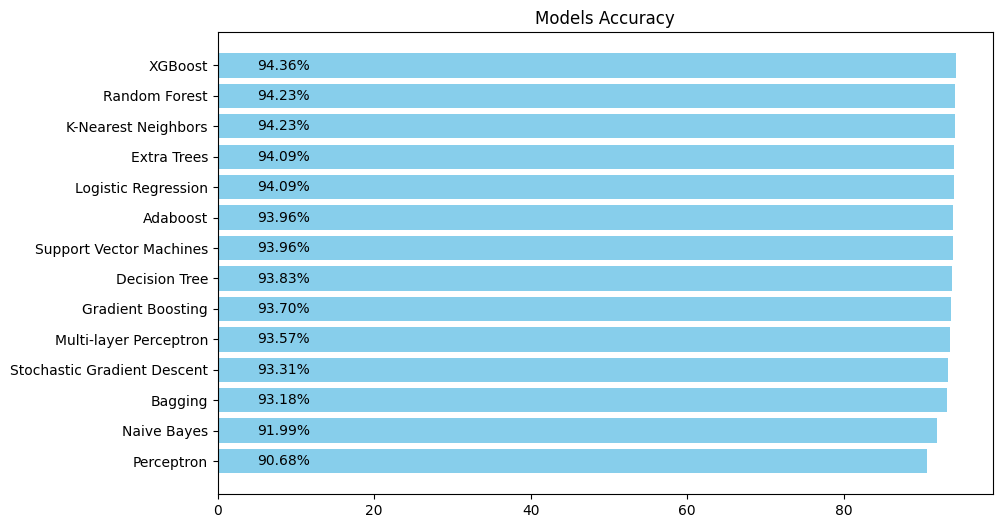

In [21]:
accuracy_data = {
    'Model Name': [
        'Extra Trees', 'Multi-layer Perceptron', 'Bagging', 'Adaboost', 'Gradient Boosting',
        'Perceptron', 'XGBoost', 'Stochastic Gradient Descent', 'Logistic Regression',
        'Naive Bayes', 'Support Vector Machines', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors'
    ],
    'Accuracy': [
        extra_trees_accuracy, mlp_accuracy, bagging_accuracy, adaboost_accuracy, gbm_accuracy,
        perceptron_accuracy, XGB_accuracy, SGD_accuracy, LR_accuracy,
        NB_accuracy, SVM_accuracy, RF_accuracy, DT_accuracy, KNN_accuracy
    ]
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df['Accuracy'] *= 100
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(accuracy_df['Model Name'], accuracy_df['Accuracy'], color='skyblue')
plt.title('Models Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding accuracy values inside each bar
for bar, accuracy in zip(bars, accuracy_df['Accuracy']):
    plt.text(5, bar.get_y() + bar.get_height() / 2, f'{accuracy:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

## Confusion matrices

In [47]:
models = [
    'Extra Trees', 'Multi-layer Perceptron', 'Bagging', 'Adaboost', 'Gradient Boosting',
    'Perceptron', 'Stochastic Gradient Descent', 'Logistic Regression',
    'Naive Bayes', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machines'
]

predictions = [
    extra_trees_pred, mlp_pred, bagging_pred, adaboost_pred, gbm_pred,
    perceptron_pred, SGD_pred, LR_pred,
    NB_pred, RF_pred, DT_pred, KNN_pred, SVM_pred
]

print("CONFUSION MATRICES\n")

# Plotting confusion matrices for each model
for model, pred in zip(models, predictions):
    cm = confusion_matrix(y_test, pred)
    print(f"{model}")
    print(cm)
    print()

CONFUSION MATRICES

Extra Trees
[[289  19]
 [ 26 428]]

Multi-layer Perceptron
[[291  17]
 [ 32 422]]

Bagging
[[288  20]
 [ 32 422]]

Adaboost
[[285  23]
 [ 23 431]]

Gradient Boosting
[[289  19]
 [ 29 425]]

Perceptron
[[276  32]
 [ 39 415]]

Stochastic Gradient Descent
[[286  22]
 [ 29 425]]

Logistic Regression
[[292  16]
 [ 29 425]]

Naive Bayes
[[283  25]
 [ 36 418]]

Random Forest
[[290  18]
 [ 26 428]]

Decision Tree
[[282  26]
 [ 21 433]]

K-Nearest Neighbors
[[292  16]
 [ 28 426]]

Support Vector Machines
[[290  18]
 [ 28 426]]



## All metrics

In [51]:
from sklearn.metrics import precision_recall_fscore_support

models = [
    'Extra Trees', 'Multi-layer Perceptron', 'Bagging', 'Adaboost', 'Gradient Boosting',
    'Perceptron', 'Stochastic Gradient Descent', 'Logistic Regression',
    'Naive Bayes', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machines'
]

predictions = [
    extra_trees_pred, mlp_pred, bagging_pred, adaboost_pred, gbm_pred,
    perceptron_pred, SGD_pred, LR_pred,
    NB_pred, RF_pred, DT_pred, KNN_pred, SVM_pred
]

results = []

for model, pred in zip(models, predictions):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, pred, pos_label='Osmancik', average='binary')
    accuracy = accuracy_score(y_test, pred)
    
    results.append({
        'Model Name': model,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score,
        'Accuracy': accuracy
    })

# XGBoost works differently
precisionXG, recallXG, f1_scoreXG, _ = precision_recall_fscore_support(y_test_LE, XGB_pred, average='binary')
accuracyXG = accuracy_score(y_test_LE, XGB_pred)
results.append({
    'Model Name': 'XGBoost',
    'Precision': precisionXG,
    'Recall': recallXG,
    'F1-score': f1_scoreXG,
    'Accuracy': accuracyXG
})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

results_df

,Model Name,Precision,Recall,F1-score,Accuracy
0,XGBoost,0.957684,0.947137,0.952381,0.943570
1,Random Forest,0.959641,0.942731,0.951111,0.942257
2,K-Nearest Neighbors,0.963801,0.938326,0.950893,0.942257
3,Extra Trees,0.957494,0.942731,0.950055,0.940945
4,Logistic Regression,0.963719,0.936123,0.949721,0.940945
5,Adaboost,0.949339,0.949339,0.949339,0.939633
6,Support Vector Machines,0.959459,0.938326,0.948775,0.939633
7,Decision Tree,0.943355,0.953744,0.948521,0.938320
8,Gradient Boosting,0.957207,0.936123,0.946548,0.937008
9,Multi-layer Perceptron,0.961276,0.929515,0.945129,0.935696


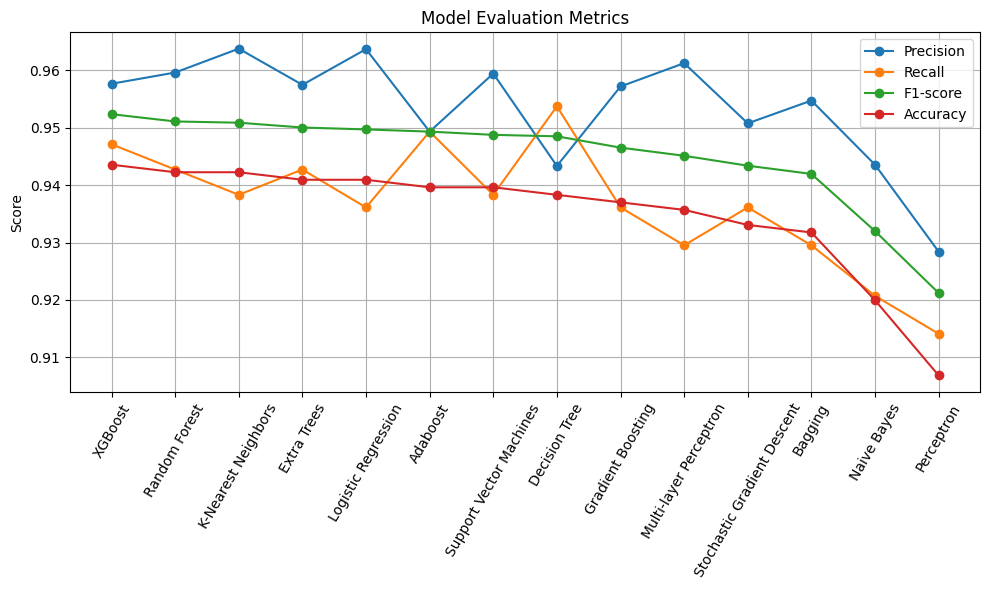

In [56]:
# Plotting each metric as a separate line chart
plt.figure(figsize=(10, 6))

plt.plot(results_df['Model Name'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['Model Name'], results_df['Recall'], marker='o', label='Recall')
plt.plot(results_df['Model Name'], results_df['F1-score'], marker='o', label='F1-score')
plt.plot(results_df['Model Name'], results_df['Accuracy'], marker='o', label='Accuracy')

plt.title('Model Evaluation Metrics')
plt.xlabel('')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()

plt.show()